# linear regression

In [50]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

## 1. Dataset

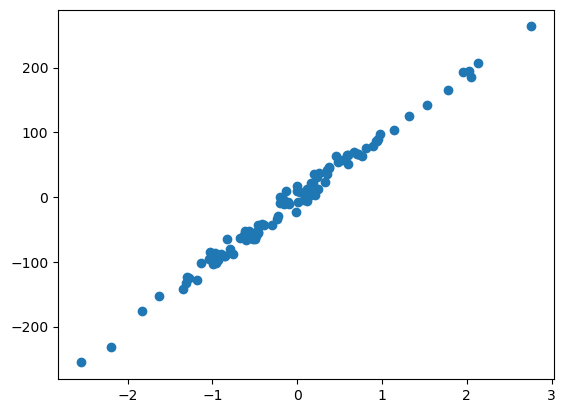

In [52]:
x,y = make_regression(n_samples=100, n_features=1, noise =10)
plt.scatter(x,y)

In [54]:
print(x.shape)
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)
(100, 1)


In [56]:
# créer la matrice X
X = np.hstack((x,np.ones(x.shape)))
X.shape

(100, 2)

In [58]:
# créer Theta0

theta=np.random.randn(2,1)
theta

array([[-0.3096208 ],
       [-0.39777865]])

## 2. Model

In [60]:
# créer la fonction model

def model(X,theta):
    return X.dot(theta)

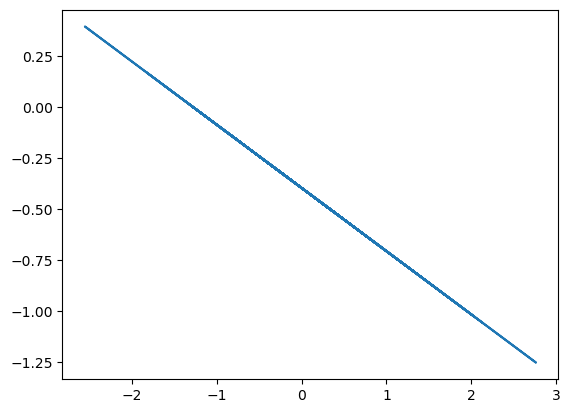

In [62]:
plt.plot(x, model(X,theta))

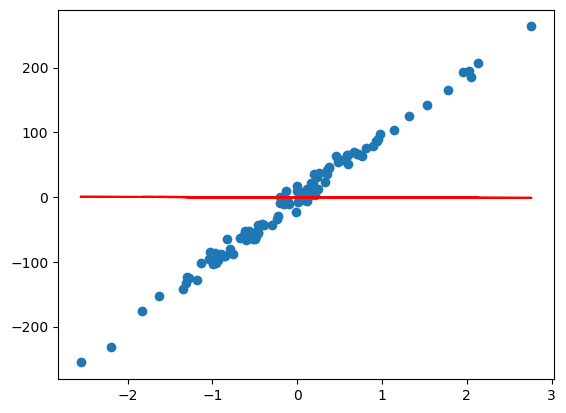

In [84]:
# test
model(X,theta)
plt.scatter(x,y)
plt.plot(x, model(X,theta), c='r')

## 3. cost function

In [66]:
def cost_function (X, y, theta): 
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [68]:
cost_function(X, y, theta)

4205.180438027498

## 4. gradients and Gradient descent

In [70]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [86]:
def grad_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        theta = theta - learning_rate*grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

## 5. model training

In [131]:
theta_final, cost_history = grad_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [133]:
theta_final

array([[97.50689206],
       [-1.2802394 ]])

In [135]:
cost_function(X,y,theta_final)

43.785778544412814

In [137]:
predictions = model(X, theta_final)

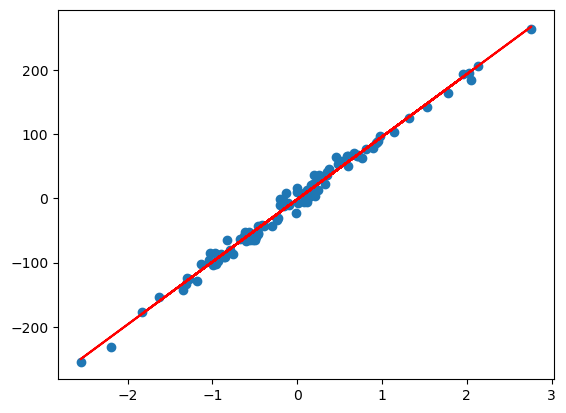

In [139]:
# test predictions 1
plt.scatter(x,y)
plt.plot(x, predictions, c='r')

## 6. Cost history

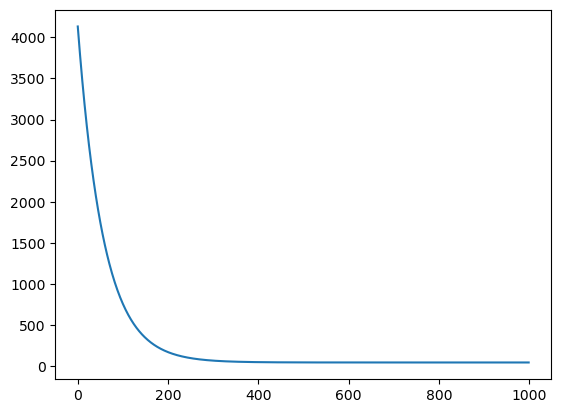

In [111]:
plt.plot(range(1000), cost_history)

## 7.Determination coefficient

In [146]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [148]:
coef_determination(y, predictions)

0.989464622474899